<a href="https://colab.research.google.com/github/klnsuman/DeepLearning/blob/master/PatternRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

#import classification_utils as cutils
from keras.layers import Dense
from keras import Sequential

from sklearn import model_selection
from sklearn.datasets import make_circles, make_moons, make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
def generate_linear_synthetic_data_classification(n_samples, n_features, n_classes, weights, class_sep=0.1, n_redundant=0):
    return make_classification(n_samples = n_samples,
                                       n_features = n_features,
                                       n_informative = n_features - n_redundant,
                                       n_clusters_per_class=1,
                                       class_sep=class_sep,
                                       n_redundant = n_redundant,
                                       n_classes = n_classes,
                                       weights = weights, random_state=100)

In [5]:
#2-d classification pattern
X, y = generate_linear_synthetic_data_classification(n_samples=1000, n_features=2, n_classes=2, weights=[0.5, 0.5], class_sep=2)


In [6]:
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
y

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
def plot_data_2d_classification(X, y, ax = None, xlim=None, ylim=None, title="Data", labels=None, alpha=1, s=30, legend=True, marker='o'):
    if isinstance(X, np.ndarray) and labels is None:
        labels =['X'+str(i) for i in range(X.shape[1])]      
    if isinstance(X, pd.core.frame.DataFrame):
        labels = X.columns
        X = X.values
    if ax is None:
        plt.figure(figsize=(20, 20))
        ax = plt.axes()   
    if ylim:
        ax.set_ylim(ylim[0], ylim[1])
    if xlim:
        ax.set_xlim(xlim[0], xlim[1])
        
    n_classes = set(y)
    colors = cm.rainbow(np.linspace(0, 1, len(n_classes)) )
    class_labels = [str(i) for i in n_classes]
    for i, color in zip(n_classes, colors):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label = class_labels[i], marker=marker,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=s, alpha=alpha) 
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_title(title)
    if legend:
        ax.legend()
    return ax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


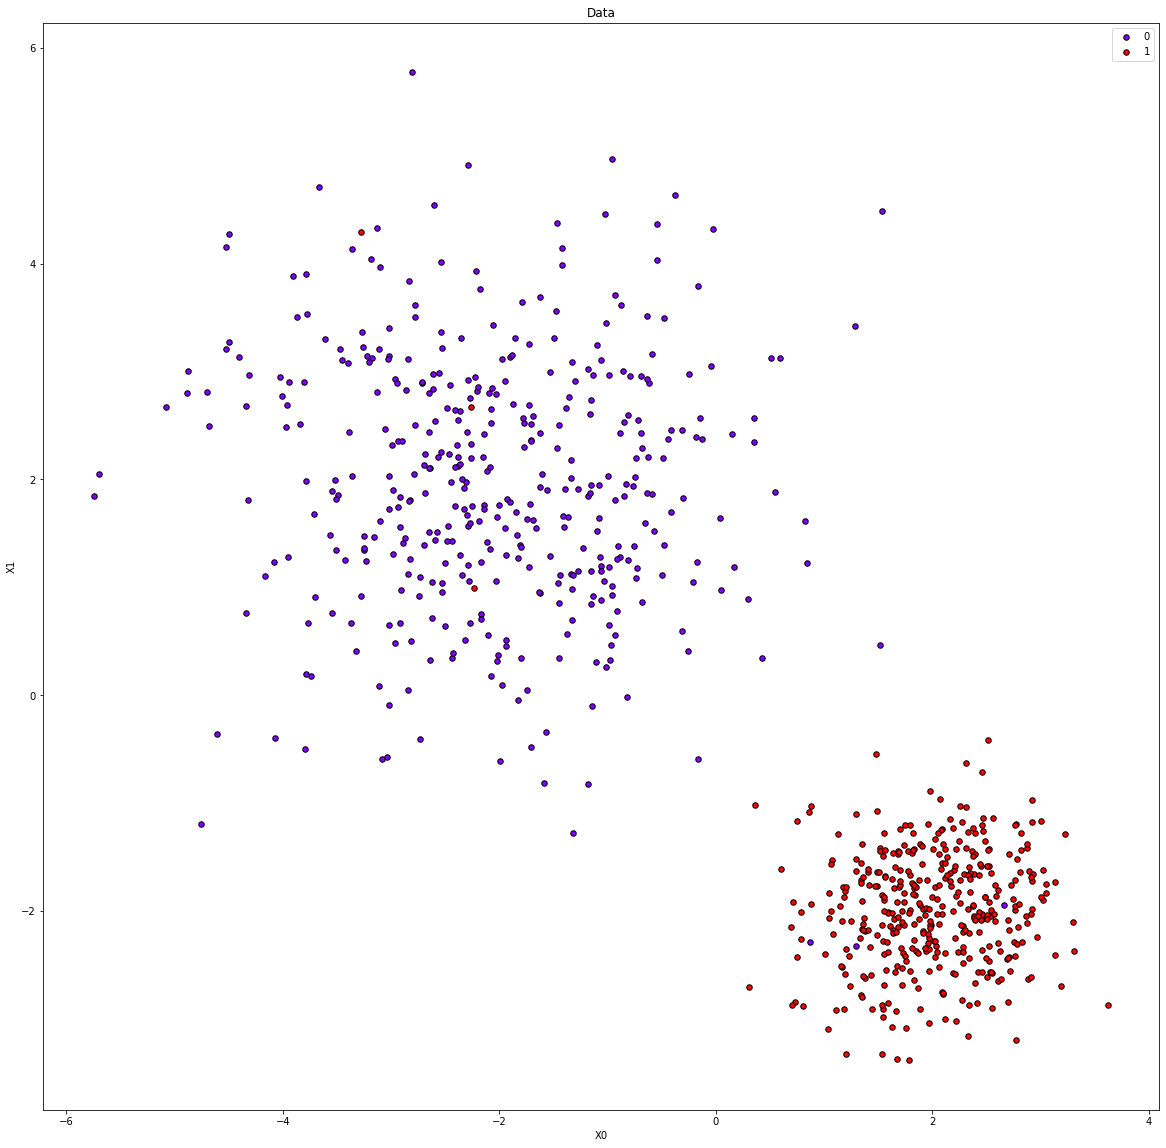

In [11]:
plot_data_2d_classification(X_train, y_train)

In [13]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))

#which loss function is good for sigmoid activation?
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='hinge', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='squared_hinge', metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, verbose=3, epochs=100,  batch_size=10, validation_split=0.1)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [14]:
print(model.summary())
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
[array([[ 1.4380698],
       [-1.7501899]], dtype=float32), array([-1.3215564], dtype=float32)]


In [15]:
def plot_loss(history):
    plt.figure()
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(history.epoch))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

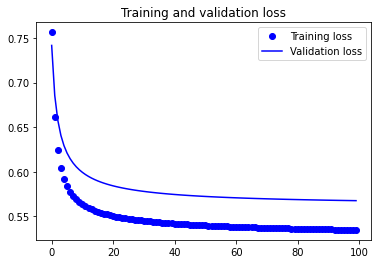

In [16]:
plot_loss(history)

In [17]:
def plot_model_2d_classification(estimator, X, y, ax = None, xlim=None, ylim=None, title=None, new_window=True, levels=None, s=30, use_keras=False):
    plt.style.use('seaborn')
    if isinstance(X, np.ndarray) :
        labels =['X'+str(i) for i in range(X.shape[1])]
    else:
        labels = X.columns
        X = X.values()
    if new_window:
        plt.figure()
    if ax is None:
        ax = plt.axes()   
    if ylim:
        ax.set_ylim(ylim[0], ylim[1])
    if xlim:
        ax.set_xlim(xlim[0], xlim[1])
        
    if xlim and ylim:
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500), np.linspace(ylim[0], ylim[1], 500))
    else:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))
    if use_keras:
        Z = estimator.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    else:
         Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    if levels:
        ax.contour(xx, yy, Z, levels=levels, linewidths=2, colors='red', alpha=1)
    else:
        ax.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=1)
    
    n_classes = set(y)
    colors = cm.rainbow(np.linspace(0, 1, len(n_classes)) )
    class_labels = [str(i) for i in n_classes]
    for i, color in zip(n_classes, colors):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label = class_labels[i],
                    cmap=plt.cm.coolwarm, edgecolor='black', s=s) 
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    return ax


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case

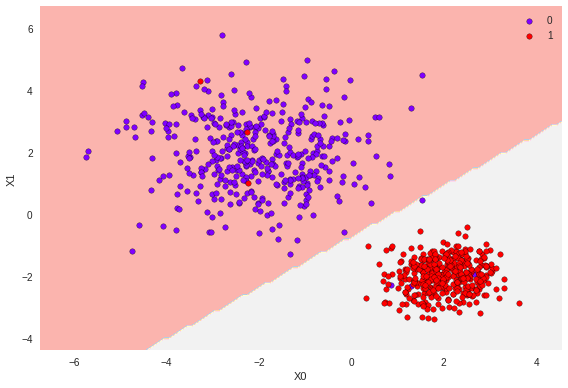

In [18]:
plot_model_2d_classification(model, X_train, y_train, use_keras=True)

In [19]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [23]:
from sklearn import cluster,metrics
def performance_metrics_hard_binary_classification(estimator, X, y, use_keras=False):
    print('[Confusion Matrix]')
    if use_keras:
        y_pred = estimator.predict_classes(X)
    else:
        y_pred = estimator.predict(X)
    print(metrics.confusion_matrix(y, y_pred))
    print('\n[Accuracy]')
    p = metrics.accuracy_score(y, y_pred)
    print(p)
    print('\n[Precision]')
    p = metrics.precision_score(y, y_pred)
    print(p)
    print('\n[Recall]')
    r = metrics.recall_score(y, y_pred)
    print(r)
    print('\n[F1-score]')
    f = metrics.f1_score(y, y_pred)
    print(f)

In [24]:
performance_metrics_hard_binary_classification(model, X_test, y_test, use_keras=True)

[Confusion Matrix]
[[ 88   0]
 [  1 111]]

[Accuracy]
0.995

[Precision]
1.0

[Recall]
0.9910714285714286

[F1-score]
0.9955156950672646


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
y_pred,y_test

(array([[1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],